In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl

# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,12)))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

runstr='Dry'
# dftab=pd.read_pickle('dfs/df_run_02_dry_delta_tab.pkl')
dfd=pd.read_pickle('dfs/df_run_02_dry.pkl')

runstr='Wet'
# dftab=pd.read_pickle('dfs/df_run_02_land_delta_tab.pkl')
dfw=pd.read_pickle('dfs/df_run_02_land.pkl')

dfs=[dfw,dfd]
tits=['Wet','Dry']

In [2]:
def fit_thalf(t,y,ylab='',ax=False):
    ly = np.log(y)
    K, A_log = np.polyfit(t, ly, 1)
    A = np.exp(A_log)
    thalf=-np.log(2)/K
    yf=np.exp(A_log+t*K)
    
    if ax:
        ax.plot(t*24,y)
        ax.plot(t*24,yf,'--')
        ax.grid(True)
        ax.set_title('t$_{lf}$='+str(tlf))
        ax.set_xlabel('t (h)')
        ax.set_ylabel(ylab)
        ax.set_xlim((0,12))        
    return(thalf)

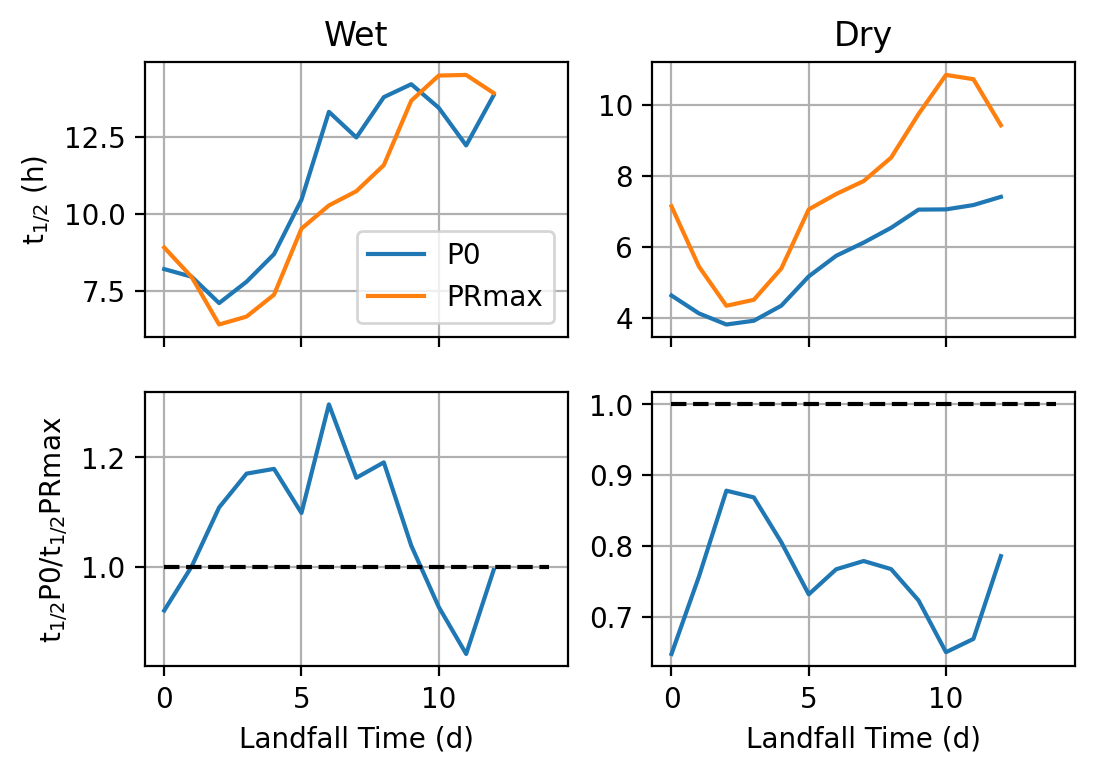

In [4]:
# tlfs=[4.0]
fig,axs=plt.subplots(2,2,dpi=200,sharex=True)

Pe=1016

for i in [0,1]:
    df=dfs[i]
    th_P0=[]
    th_PRmax=[]
    tlfs=df.tlf.unique()
    df['tal']=df.t-df.tlf
    for tlf in tlfs:
        dft=df[df.tlf.eq(tlf)]
        r=dft.r.head(1).values[0]
        rmax=dft.rV10max.head(1).values
        rx=np.abs(r-rmax).argmin()
        P0=[];PRmax=[]
        tals=dft.tal
        for tal in tals:
            dftt=dft[dft.tal.eq(tal)]
            r=dftt.r.values[0]
            Pr=dftt.Pr.values[0]
    #         plt.plot(r,P)
            P0.append(Pr[0])
            PRmax.append(Pr[rx])
    #     plt.plot(tals*24,P0)
    #     plt.plot(tals*24,Prmax)
        P0=np.array(P0)
        PRmax=np.array(PRmax)
        th_P0.append(fit_thalf(tals,Pe-P0)*24)
        th_PRmax.append(fit_thalf(tals,Pe-PRmax)*24)
    
    th_P0=np.array(th_P0)
    th_PRmax=np.array(th_PRmax)
    
    ax=axs[0,i]
    ax.plot(th_P0)
    ax.plot(th_PRmax)
    ax.grid(True)
    ax.set_title(tits[i])
    if i==0: 
        ax.set_ylabel('t$_{1/2}$ (h)')
        ax.legend(('P0','PRmax'))
    
    ax=axs[1,i]
    ax.plot(th_P0/th_PRmax)
    ax.plot([0,14],[1,1],'k--')
    ax.grid(True)
    ax.set_xlabel('Landfall Time (d)')
    if i==0: ax.set_ylabel('t$_{1/2}$P0/t$_{1/2}$PRmax')
    